>### [TEST_1] Linear Regression (TensorFlow)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.19.5
TensorFlow Version :2.4.0
Matplotlib Version :3.2.2


> ### Input and Label

In [ ]:
# 3 Input(AGE, BMI, Value) , Labels(BP) 
x_input = tf.constant([[25,22,5],[25,26,6],[25,30,5],[35,22,7],[35,26,7],[35,30,8],[45,22,7],[45,26,8],[45,30,7],[55,22,6],[55,26,7],[55,30,9],[65,22,6],[65,26,8],[65,30,10],[73,22,8],[73,26,8],[73,30,8]], dtype= tf.float32)
labels = tf.constant([[118],[125],[130],[118],[126],[123],[120],[124],[130],[122],[125],[130],[127],[130],[130],[125.5],[130],[138]], dtype= tf.float32)

# W, B
W = tf.Variable(tf.random.normal((3, 1)), dtype=tf.float32)
B = tf.Variable(tf.random.normal(()), dtype=tf.float32)


In [ ]:
# Min Max Scaler
x_input_org = x_input # 나중에 원본데이터 확인을 위해 백업
x_min, x_max = np.min(x_input, axis=0), np.max(x_input, axis=0)
x_input = (x_input-x_min)/(x_max-x_min)

>### Hypothesis : Linear Equation (Multi-Variable)
>### $X = \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \\ \end{bmatrix}$
>### $W = \begin{bmatrix} w_{1} \\ w_{2} \\\end{bmatrix}$
>### $H(x) = XW + b$

In [ ]:
# Hypothesis
def Hypothesis(x):
  return tf.matmul(x, W) + B

>### Cost Function : Mean Squared Error (MSE)
>### $\sum_{i=1}^{n}(h(x_{i})-y_{i})^{2}$

In [ ]:
# Cost
def Cost():
  return tf.reduce_mean(tf.square(Hypothesis(x_input)-labels))

### 학습 (Training)

In [ ]:
%%time
# Parameter Set
epochs = 100
learning_rate = 0.5
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)


training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)


for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs/20) == 0:
      print("[{:>6}] cost = {:>10.4}".format(cnt, cost_graph[cnt]))
  optimizer.minimize(Cost,[W, B])    

[     0] cost =  1.559e+04
[     5] cost =   1.65e+03
[    10] cost =      210.8
[    15] cost =      41.63
[    20] cost =       14.6
[    25] cost =      7.952
[    30] cost =      5.647
[    35] cost =      4.651
[    40] cost =      4.135
[    45] cost =      3.821
[    50] cost =      3.605
[    55] cost =      3.446
[    60] cost =      3.324
[    65] cost =      3.229
[    70] cost =      3.153
[    75] cost =      3.094
[    80] cost =      3.047
[    85] cost =      3.009
[    90] cost =       2.98
[    95] cost =      2.956
[   100] cost =      2.938
CPU times: user 263 ms, sys: 6.01 ms, total: 269 ms
Wall time: 322 ms


>### Hypothesis Test 

In [ ]:
print("[ Hypothesis test ]")

H_x = Hypothesis(x_input)
for x,h,l in zip(x_input_org, H_x, labels):
  print("Input : {}, {}, {} => BP : {:>7.4} [label => {}]".format(x[0],x[1],x[2], h[0],l))

[ Hypothesis test ]
Input : 25.0, 22.0, 5.0 => BP :   118.8 [label => [118.]]
Input : 25.0, 26.0, 6.0 => BP :   122.5 [label => [125.]]
Input : 25.0, 30.0, 5.0 => BP :   129.1 [label => [130.]]
Input : 35.0, 22.0, 7.0 => BP :   118.0 [label => [118.]]
Input : 35.0, 26.0, 7.0 => BP :   123.2 [label => [126.]]
Input : 35.0, 30.0, 8.0 => BP :   126.9 [label => [123.]]
Input : 45.0, 22.0, 7.0 => BP :   120.3 [label => [120.]]
Input : 45.0, 26.0, 8.0 => BP :   124.0 [label => [124.]]
Input : 45.0, 30.0, 7.0 => BP :   130.6 [label => [130.]]
Input : 55.0, 22.0, 6.0 => BP :   124.0 [label => [122.]]
Input : 55.0, 26.0, 7.0 => BP :   127.7 [label => [125.]]
Input : 55.0, 30.0, 9.0 => BP :   129.9 [label => [130.]]
Input : 65.0, 22.0, 6.0 => BP :   126.3 [label => [127.]]
Input : 65.0, 26.0, 8.0 => BP :   128.5 [label => [130.]]
Input : 65.0, 30.0, 10.0 => BP :   130.7 [label => [130.]]
Input : 73.0, 22.0, 8.0 => BP :   125.1 [label => [125.5]]
Input : 73.0, 26.0, 8.0 => BP :   130.3 [label => 

>### Plotting

<function matplotlib.pyplot.show>

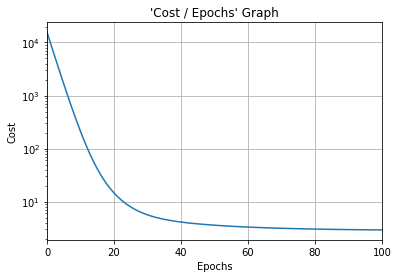

In [ ]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show